# Naiwny klasyfikator Bayesa

Rozważymy klasyczny problem klasyfikacji odmian irysów na podstawie cech płatków. Jest to klasyczny już problem, często wykorzystywany przy porównywaniu różnych technik klasyfikacji. Więcej o pochodzeniu tych danych i problemie można przeczytać tu: [Iris_flower_data](https://en.wikipedia.org/wiki/Iris_flower_data_set)

W tym notatniku użyjemy naiwnego klasyfikatora Bayesa. Kod napiszemy w oparciu o implementacje klasyfikatora Bayesa z biblioteki [scikit-learn](http://scikit-learn.org/stable/about.html#citing-scikit-learn)

Zaczerpniemy stamtąd:
* obiekt klasyfikatora [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html),
* zbiór danych,
* funkcje do oceny jakości klasyfikacji

### Przygotowanie środowiska programistycznego

In [1]:
import numpy as np
from termcolor import colored

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## Wczytanie danych do analizy

Zbiór danych ``Iris`` jest dostępny w bibliotece sklearn jako jeden z wielu standardowych zbiorów [testowych](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [2]:
#Wczytywanie danych
iris = datasets.load_iris() 

#Wypisywanie zawartości wczytanego obiektu
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:

iris['data_module']

'sklearn.datasets.data'

## Analiza zawartości danych

**Proszę** wypisać:

* nazwy gatunków,
* kodowanie gatunków, czyli liczby przypisane do nazw gatunków ```target```,
* nazwy zmiennych opisujących gatunki ```feature_names```,

**Wskazówka**: informacje o zbiorze uzyskujemy traktując go jak słownik:
```Python
print(iris['filename'])
```

In [5]:
print(iris['target_names'])
print(iris['target'])
print(iris['feature_names'])
print(iris['DESCR'])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ======

## Przepisane danych do obiektu Pandas DataFrame

**Proszę** utworzyć obiekt DataFrame zawierający własności ("features") oraz etykiety ("labels")
* przypisać poprawne nazwy kolumn: ```columns=iris.feature_name```,
* dodać do obiektu DataFrame kolumnę ```labels``` zawierającą etykiety,
* wypisać własności przykładu o indeksie 5
* sprawdzić jaki gatunek odpowiada wartości etykiety przykładu o indeksie 5.

**Wskazówka:** można skorzystać z funkcji DataFrame.loc(index)

Oczekiwany wynik:
```Python
sepal length (cm)    5.4
sepal width (cm)     3.9
petal length (cm)    1.7
petal width (cm)     0.4
label                0.0
Name: 5, dtype: float64
Gatunek przykładu o indeksie 5: setosa
```

In [6]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['labels'] = iris['target']
example_species = df.iloc[5]
print(df.describe())
print(colored("Gatunek przykładu o indeksie 5:","blue"), example_species)

def which_iris(i):
    return iris['target_names'][int(i)]

print(which_iris(example_species['labels']))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      labels  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Gatunek przykładu o indeksie 5: sepal length (cm)    5.4
sepal width (cm

## Analiza wizualna danych. 

Pierwszy krok przy analizie danych z użyciem dowolnego algorytmu to ich inspekcja. Korzystając z metod klasy `DataFrame`.

**Proszę:**
* narysować jednowymiarowe histogramy dla wszystkich zmiennych (kolumn obiektu DataFrame)

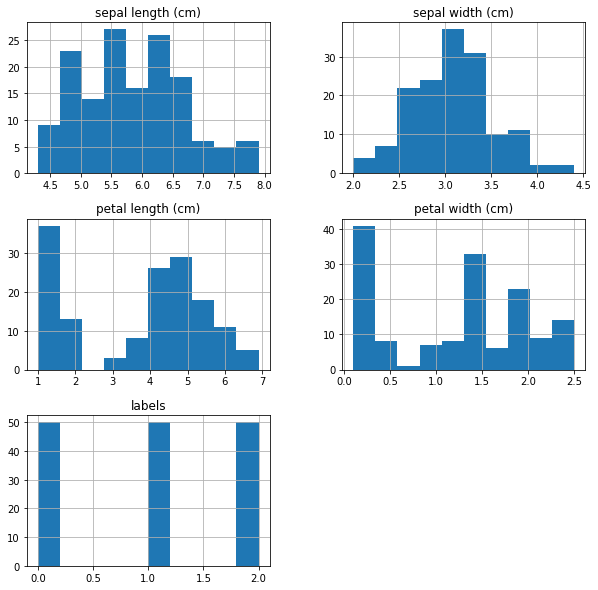

In [6]:
df.hist(figsize=(10,10))
pass

Naszym zadaniem jest rozdzielenie gatunków na podstawie własności. Poniższa komórka rysuje rozkłady (histogramy) własności w podziale na  gatunki. 

**Proszę:**

* na podstawie histogramów proszę zidentyfikować cechy, które najlepiej odróżniają gatunki.

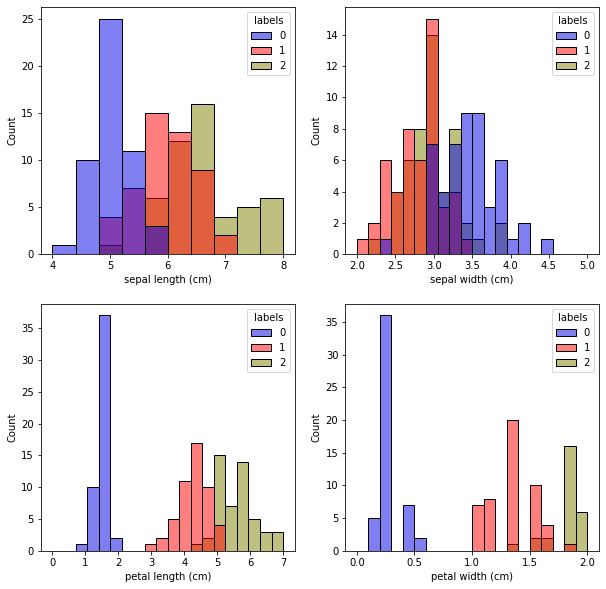

In [10]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.5, .5, 0)}

sns.histplot(data=df, x="sepal length (cm)", hue="labels", binrange=(4,8),palette=color_map, bins=10, ax=axes[0,0]);
sns.histplot(data=df, x="sepal width (cm)", hue="labels", palette=color_map, binrange=(2,5), bins=20, ax=axes[0,1]);
sns.histplot(data=df, x="petal length (cm)", hue="labels", palette=color_map, binrange=(0,7), bins=20, ax=axes[1,0]);
sns.histplot(data=df, x="petal width (cm)", hue="labels", palette=color_map, binrange=(0,2), bins=20, ax=axes[1,1]);

## Wykres skrzypcowy ("violin plot")

Histogramy dla poszczególnych gatunków się nakładają częściowo. Inny sposób wizualizacji to wykres skrzypcowy (ang. "violin plot"). Poniższa komórka
rysuje wykresy skrzypcowe dla poszczególnych cech z podziałem na gatunki.

**Proszę:**

* na podstawie rysunków proszę zidentyfikować cechy, które najlepiej odróżniają gatunki.

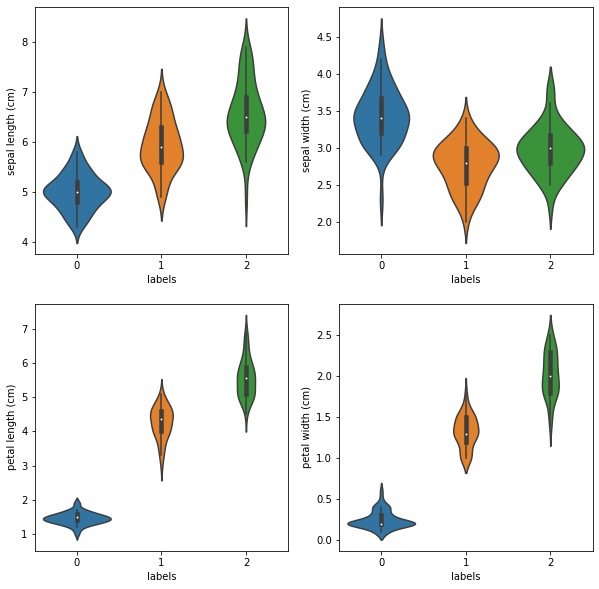

In [8]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

for index, columnName in enumerate(df.columns[0:4]):
    sns.violinplot(data=df, x="labels", y=columnName,ax=axes[(int)(index/2),index%2]);   

## Analiza dwuwymiarowa

Rysunki narysowane do tej pory były jednowymiarowe. Kolejny krok to wizualna analiza korelacji między cechami. Korelację między cechami można zwizualizować na wiele sposobów. Poniższa komórka rysuje:

* macierz kowariancji między wszystkimi kolumnami danych włączając etykiety
* dwuwymiarowe rozkłady dla par cech

Więcej przykładów wyzualizacji można znaleźć [w dokumentacji](https://seaborn.pydata.org/tutorial/axis_grids.html).

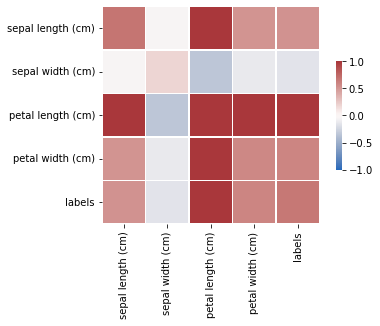

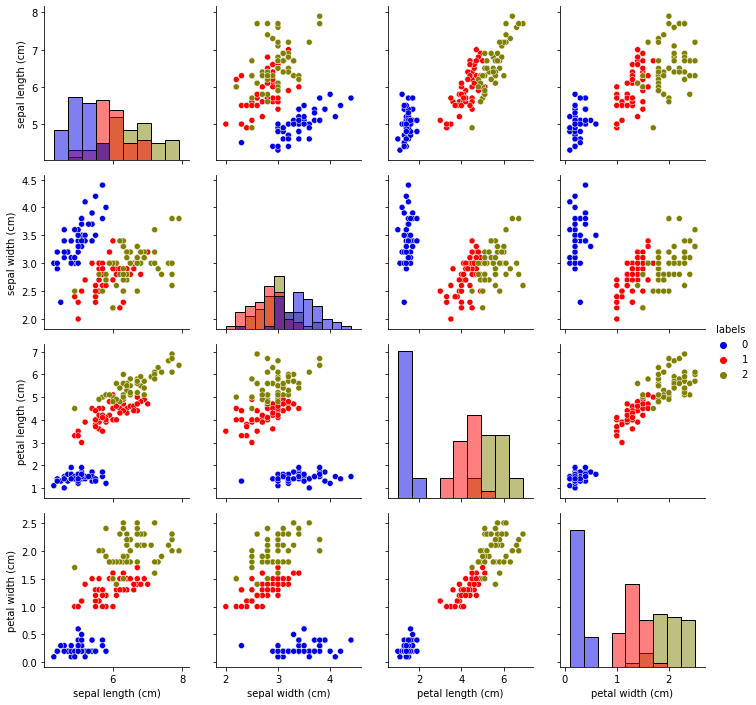

In [11]:
corelationMatrix = df.cov()

#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns.heatmap(corelationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5});
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corelationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, vmin=-1, vmax=1);

graph = sns.PairGrid(df, hue="labels", palette=color_map)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,-0.897674,1.015602,-1.335752,-1.311052,-1.220656
1,-1.139200,-0.131539,-1.335752,-1.311052,-1.220656
2,-1.380727,0.327318,-1.392399,-1.311052,-1.220656
3,-1.501490,0.097889,-1.279104,-1.311052,-1.220656
4,-1.018437,1.245030,-1.335752,-1.311052,-1.220656
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,1.220656
146,0.551486,-1.278680,0.703564,0.919223,1.220656
147,0.793012,-0.131539,0.816859,1.050416,1.220656
148,0.430722,0.786174,0.930154,1.443994,1.220656


## Przygotowanie danych wejściowych (ang. preprocessing)

Od tego momentu, aby ułatwić analizę wyniku działania modelu ograniczymy się do dwu cech - wtedy będzie można narysować podział na gatunki na płaszczyźnie.

Standardową procedurą obróbki danych przed utworzeniem modelu jest ich normalizacja, najlepiej do zakresu [-1,1] lub [0,1].
Znormalizujemy wartości cech według wzoru:

\begin{equation}
x_{norm} = \frac{x - \mu_{x}}{\sigma_{x}}
\end{equation}

**Proszę:**

* utworzyć nowy obiekt DataFrame zawierający znormalizowane kolumny własności oraz etykiety: ```df_normalized``` 
* utworzyć obiekt DataFrame zawierający tylko wybrane cechy, oraz etykiety: ```["sepal width (cm)","petal length (cm)", "label"]```: ```df_subset```
* wypisać zawartość obiektów ```df_normalized``` i ```df_subset```. Czy widać efekt normalizacji?

**Uwaga:** proszę nie normalizować wartości etykiet

In [7]:
df_normalized = (df-df.mean())/df.std()
df_normalized['labels'] = iris['target']
df_subset = pd.concat([df_normalized['sepal width (cm)'], df_normalized['petal length (cm)'], 
                      df_normalized['labels']],axis=1,ignore_index=False)

print(colored("Normalized dataset:","blue"))
print(df_normalized.describe())
print(colored("Normalized dataset with only two features:","blue"))      
print(df_subset.describe())

Normalized dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.457168e-15     -1.638319e-15      -1.292300e-15   
std         1.000000e+00      1.000000e+00       1.000000e+00   
min        -1.863780e+00     -2.425820e+00      -1.562342e+00   
25%        -8.976739e-01     -5.903951e-01      -1.222456e+00   
50%        -5.233076e-02     -1.315388e-01       3.353541e-01   
75%         6.722490e-01      5.567457e-01       7.602115e-01   
max         2.483699e+00      3.080455e+00       1.779869e+00   

       petal width (cm)      labels  
count      1.500000e+02  150.000000  
mean      -5.543714e-16    1.000000  
std        1.000000e+00    0.819232  
min       -1.442245e+00    0.000000  
25%       -1.179859e+00    0.000000  
50%        1.320673e-01    1.000000  
75%        7.880307e-01    2.000000  
max        1.706379e+00    2.000000  
Normalized dataset with only two features:
       se

**Proszę:** 
* narysować dwuwymiarowe rozkłądy dla par cech dla znormalizowanych danych z dwiema cechami.

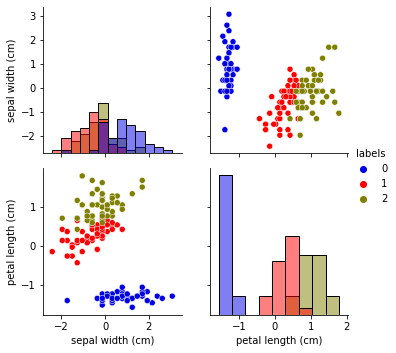

In [12]:
graph = sns.PairGrid(df_subset, hue="labels", palette=color_map)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();
pass

## Definicja i trening klasyfikatora

W tym notatniku użyjeny klasyfikatora o [naive bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) w wersji gaussowskiej.

**Proszę:**

* utworzyć obiekt ```gnb``` klasy [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* przeprowadzić trening z użyciem funkcji ```fit()```

In [13]:
gnb = GaussianNB()
X = df_subset[['sepal width (cm)','petal length (cm)']]
Y = df_subset['labels']
gnb.fit(X,Y)
print(colored("Accuracy on train dataset: ","blue"), gnb.score(X,Y))

Accuracy on train dataset:  0.92


**Proszę:**


* wypisać wartośći parametrów modelu: średnie i odchylenia standardowe rozkładów Gaussa. Średnie znajdują się w polu  ```gnb.theta_```, a wariancje
  w ```gnb.var_```
* wypisać średnie i odchylenia standardowe rozkładów cech w podziale na gatunki obliczone z danych
* porównać uzyskane wartości. Czy liczby są zgodne z oczekiwaniami? 

**Wskazówka:** proszę skorzystać z grupowania danych: `DataFrame.groupby()`.

Oczekiwany wynik dla parametrów z modelu:
```Python
Mean:
 [[ 0.85041372 -1.30063009]
 [-0.65922358  0.28437121]
 [-0.19119013  1.01625888]]
Sigma:
 [[0.86093968 0.09738785]
 [0.71270594 0.26351816]
 [0.73246175 0.30949324]]
```

In [15]:
print('Mean from fit:')
print(gnb.theta_)
print('Sigma from fit:')
print(np.sqrt(gnb.var_))
print('Mean from data:')
print(df_subset.groupby(by='labels').mean())
print('Standard deviation from data:')
print(df_subset.groupby(by='labels').std())
pass

Mean from fit:
[[ 0.85041372 -1.30063009]
 [-0.65922358  0.28437121]
 [-0.19119013  1.01625888]]
Sigma from fit:
[[0.86093968 0.09738785]
 [0.71270594 0.26351816]
 [0.73246175 0.30949324]]
Mean from data:
        sepal width (cm)  petal length (cm)
labels                                     
0               0.850414          -1.300630
1              -0.659224           0.284371
2              -0.191190           1.016259
Standard deviation from data:
        sepal width (cm)  petal length (cm)
labels                                     
0               0.869680           0.098377
1               0.719942           0.266194
2               0.739898           0.312635


### Porównanie dopasowanych rozkładów z danymi.
Komórki poniżej zawierają funkcje:

* ```plot_2d_gaussian(mean, covariance, axis)``` - funkcja która rysuje dwuwymiarowy rozkład Gaussa o średniej ```mean``` i diagonalej macierzy kowariancji ```np.diag(cov)``` na obszarze danym przez obiekt ```axis```,
* ```plot_2d_divison(model, axis)``` - funkcja która rysuje kontury podziału na klasy na podstawie modelu ```model``` na obszarze danym przez obiekt ```axis```.

In [16]:
def plot_2d_gaussian(mean, cov, axis):
    xx, yy = np.mgrid[-3:3:0.1, -3:2:0.1]
    pos = np.dstack((xx, yy))
    zz = multivariate_normal.pdf(pos, mean=mean, cov=np.diag(cov))
    axis.contour(xx, yy, zz, 10) 
    
def plot_2d_divison(model, axis):
    xx, yy = np.mgrid[-4:4:0.1, -4:4:0.1]  
    pos = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(pos)
    zz = np.reshape(zz, xx.shape)
    axis.contour(xx, yy, zz, cmap=plt.cm.Paired)

Poniższa komórka rysuje:

* dwuwymiarowy rozkład danych dla analizowanego zbioru. Punkty są pokolorowane według przynależności do gatunku,
* funkcjia ```plot_2d_gaussian(mean, covariance, axis)``` rysune na tym samym rysunku pozimnice rozkładów Gaussa modelu ```gnb = GaussianNB()```.

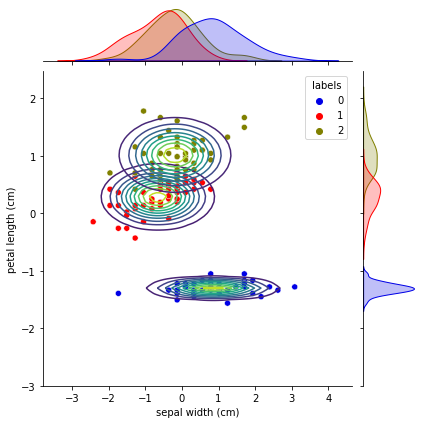

In [17]:
graph = sns.jointplot(x="sepal width (cm)", y="petal length (cm)", data=df_subset, hue="labels", palette=color_map)

for classNumber in range(0,3): 
    plot_2d_gaussian(mean=gnb.theta_[classNumber], cov=np.diag(gnb.var_[classNumber]), axis=graph.ax_joint)  

**Proszę** 

* korzystając z funkcji ```sns.jointplot``` narysować dwuwymiarowy rozkład danych dla analizowanego zbioru. Punkty powinny być pokolorowane według przynależności do gatunku,
* korzystając z funkcji ```plot_2d_divison(model, axis)``` nanieść granice podziału na gatunki.

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


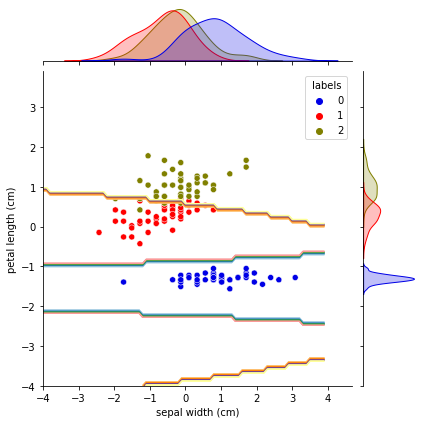

In [18]:
graph = sns.jointplot(data=df_subset, x ='sepal width (cm)',y='petal length (cm)', hue='labels', palette=color_map)

for classNumber in range(0,3): 
    plot_2d_divison(model=gnb, axis=graph.ax_joint)


pass

## Analiza jakości modelu
Korzystając z walidacji krzyżowej przeprowadzimy analizę miar jakości modeli. Skorzystamy z funkcji opisanych w rozdziale [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html) dokumantacji pakietu scikit-learn.

**Proszę:**

* przejrzeć listę dostępnych metryk i upewnić się, co dokładnie zwracają poszcególne funkcje,
* porównać definicje z scikit-learn z definicjami z [wykładu](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_Ocena_jako%C5%9Bci_klasyfikacji),
* uzupełnić kod funkcji ```printScores(model, X, Y)```, która przyjmuje ```model```, cechy ```X``` oraz etykiety ```Y``` i wypisuje
  raport o klasyfikacji oraz macierz pomyłek
  
Oczekiwany wynik:
```Python
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]
```

In [19]:
def printScores(model, X, Y):
    print("Classification report:")
    print('precision   recall  f1-score  support')
    print(classification_report(Y, model.predict(X)))
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))
    
printScores(gnb, X, Y)  

Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]


## Porównanie  modeli

**Proszę:**

Stworzyć trzy modele klasyfikatorów:

* korzystający z cech ```["sepal width (cm)","petal length (cm)"]``` (nasz dotychczasowy model): ```gnb_features_1_2```
* korzystający tylko z cech ```["sepal length (cm)","sepal width (cm)"]```: ```gnb_features_0_1```
* korzystający ze wszytkich czterech cech: ```gnb_features_all```
* dla każdego z modeli wypisać wartości miar jakości i na ich podstawie stwierdzić który model jest najlepszy

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'labels'],
      dtype='object')

In [21]:
print(colored("Model using","blue"), "sepal width and petal length", colored("features:", "blue"))
gnb = GaussianNB()
X = df_subset[['sepal width (cm)','petal length (cm)']]
Y = df_subset['labels']
gnb.fit(X,Y)
printScores(gnb, X, Y)  

print(colored("Model using","blue"), "sepal length and sepal width", colored("features:", "blue"))
gnb_0_1 = GaussianNB()
X = df_normalized[["sepal length (cm)","sepal width (cm)"]]
Y = df['labels']
gnb_0_1.fit(X,Y)
printScores(gnb_0_1, X, Y)

print(colored("Model using","blue"), "all", colored("features:", "blue"))
gnb_all = GaussianNB()
X = df_normalized[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = df_normalized['labels']
gnb_all.fit(X,Y)
printScores(gnb_all, X, Y)

pass

Model using sepal width and petal length features:
Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]
Model using sepal length and sepal width features:
Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.65      0.74      0.69        50
           2       0.70      0.62      0.66        50

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg  

## Analiza wpływu normalizacji danych.

**Proszę:**

* wytrenować model na wszytkich cechach, ale korzystając z oryginalnych danych - bez normalizacji wartości cech,
* wypisać wartości miar jakościdla uzyskanego modelu

Czy normalizacja wpływa na wydajność naszego modelu?

In [22]:
print(colored("Model using","blue"), "all", colored("features:", "blue"), "without normalisation")
gnb_all2 = GaussianNB()
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = df['labels']
gnb_all2.fit(X,Y)
printScores(gnb_all2, X, Y)
pass

Model using all features: without normalisation
Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Zadanie domowe

## Dekorelacja zmiennych.
Niektóre zmienne są silnie skorelowane - algorytm "naiwny" nie radzi sobie z tym dobrze. 

**Proszę** wytenować model na następujących danych:

* zawierających dwie silnie skorelowane cechy:
```Python 
["petal length (cm)","petal width (cm)"]
``` 
* zawierających ich zdekorelowane funkcje $x$ i $y$ będące sumą i różnicą skorelowanych zmiennych:
```Python
x = "petal length (cm)" + "petal width (cm)"
y = "petal length (cm)" - "petal width (cm)"
```
* proszę narysować dwuwymiarowe rozkłady dla zmiennych $x$ i $y$
* czy model używający zmiennych $x$ i $y$ jest lepszy/gorszy od modeli trenowanych wcześniej? Odpowiedź uzasadnij.

Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Classification report:
precision   recall  f1-score  support
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        50
           2       0.98      0.96      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]


/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


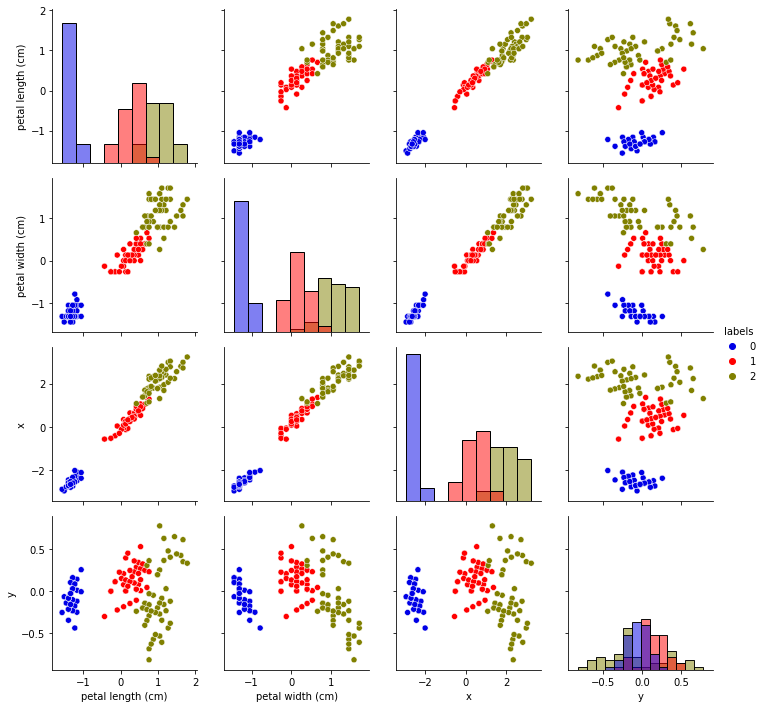

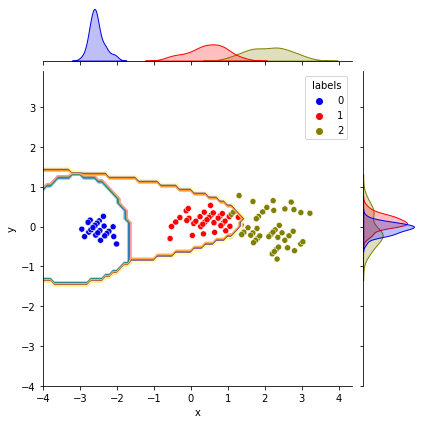

In [28]:
gnb_corr = GaussianNB()
X = df_normalized[["petal length (cm)","petal width (cm)"]]
Y = df_normalized['labels']
gnb_corr.fit(X,Y)
printScores(gnb_corr, X, Y)

gnb_non_corr = GaussianNB()
df_normalized['x'] = df_normalized["petal length (cm)"] + df_normalized["petal width (cm)"]
df_normalized['y'] = df_normalized["petal length (cm)"] - df_normalized["petal width (cm)"]
X = df_normalized[['x','y']]
Y = df_normalized['labels']
gnb_non_corr.fit(X,Y)
printScores(gnb_non_corr, X, Y)

df_subset2 = df_normalized[["petal length (cm)","petal width (cm)","x","y","labels"]]

graph = sns.PairGrid(df_subset2, hue="labels", palette=color_map)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();


graph = sns.jointplot(data=df_subset2, x ='x',y='y', hue='labels', palette=color_map)

for classNumber in range(0,3): 
    plot_2d_divison(model=gnb_non_corr, axis=graph.ax_joint)


pass